In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt 
import textwrap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Normalizer

In [2]:
# Functions
# Function to import the dataset
def importdata():
    url = "https://raw.githubusercontent.com/MaharLeika18/Data-Mining---Python/refs/heads/Loue/Midterms_Act1/Act%206/Telco-Customer-Churn.csv"
    data = pd.read_csv(url)

    # Displaying dataset information
    print("Dataset Length: ", len(data))
    print("Dataset Shape: ", data.shape)
    print("First 5 Rows: \n", data.head())
    
    return data

# Data preprocessing
def splitdataset(data, norm_for_knn=True):
    # Drop irrelevant columns (not useful for prediction)
    data = data.drop("customerID", axis=1)
    data = data.drop("gender", axis=1)
    data = data.drop("SeniorCitizen", axis=1)

    # Convert columns like Churn, Partner, Dependents, etc. into binary (Yes=1, No=0)
    data["Churn"] = data["Churn"].map({"Yes": 1, "No": 0})
    data["Partner"] = data["Partner"].map({"Yes": 1, "No": 0})
    data["Dependents"] = data["Dependents"].map({"Yes": 1, "No": 0})
    data["PhoneService"] = data["PhoneService"].map({"Yes": 1, "No": 0})
    data["PaperlessBilling"] = data["PaperlessBilling"].map({"Yes": 1, "No": 0})

    # Convert categorical variables into dummy/indicator variables
    data = pd.get_dummies(data, drop_first=True)

    # Features and target
    X = data.drop("Churn", axis=1)
    Y = data["Churn"]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=0.3, random_state=100, stratify=Y
    )

    # Normalize features for KNN but not for Decision Tree
    if norm_for_knn:   
        normalizer = Normalizer()
        X_train = normalizer.fit_transform(X_train)
        X_test = normalizer.transform(X_test)

    return X, Y, X_train, X_test, y_train, y_test

# Functions for training, predicting, and assessing decision tree algo
def train_using_gini(X_train, y_train):
    # Creating the classifier object (Experiment w/ vars for desired result)
    clf_gini = DecisionTreeClassifier(
        criterion="gini", random_state=100, max_depth=4, min_samples_leaf=10
    )

    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini

def train_using_entropy(X_train, y_train):
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
        criterion="entropy", random_state=100, max_depth=4, min_samples_leaf=10
    )

    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

def train_with_pruning(X_train, y_train, ccp_alpha=0.01):  
    clf_pruned = DecisionTreeClassifier(
        criterion="gini", random_state=100, ccp_alpha=ccp_alpha  
    )
    clf_pruned.fit(X_train, y_train)
    return clf_pruned

def prediction(X_test, clf_object):
    y_pred = clf_object.predict(X_test)
    print("Predicted values:", y_pred[:10])
    print(y_pred)
    return y_pred

def cal_accuracy(y_test, y_pred, model_name="Model"):
    print(f"\n{model_name}")
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred)*100)
    print("Classification Report:\n", classification_report(y_test, y_pred))

# Function for KNN training + plotting
def train_knn(X_train, y_train, n_neighbors=5):  
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    return knn

def plot_knn_accuracy(X_train, X_test, y_train, y_test, k_range=range(1, 21)):
    accuracies = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        acc = knn.score(X_test, y_test)
        accuracies.append(acc)
    
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, accuracies, marker='o')
    plt.title("KNN Accuracy vs. Number of Neighbors (k)")
    plt.xlabel("Number of Neighbors (k)")
    plt.ylabel("Accuracy")
    plt.xticks(k_range)
    plt.grid(True)
    plt.show()

# Function to plot the decision tree
def plot_decision_tree(clf_object, feature_names, class_names, max_width=15, title="Decision Tree"):
    plt.figure(figsize=(20, 10))
    clean_tree = plot_tree(
        clf_object,
        filled=True,
        feature_names=feature_names,
        class_names=class_names,
        rounded=True,
        fontsize=8,
    )

    # Remove gini, samples, value from text
    for tree in clean_tree:
        if hasattr(tree, "get_text"):
            txt = tree.get_text()
            clean_txt = txt.split("\n")[0]
            wrapped_txt = "\n".join(textwrap.wrap(clean_txt, width=max_width))
            tree.set_text(wrapped_txt)
    plt.title(title, fontsize=20)
    plt.show()

In [3]:
# Import and train Gini & Entropy model
data = importdata()
X, Y, X_train, X_test, y_train, y_test = splitdataset(data)

clf_gini = train_using_gini(X_train, y_train)
clf_entropy = train_using_entropy(X_train, y_train)

Dataset Length:  7043
Dataset Shape:  (7043, 21)
First 5 Rows: 
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No  

In [4]:
# Predict and assess Gini model
y_pred_gini = prediction(X_test, clf_gini)
cal_accuracy(y_test, y_pred_gini, "\t\t     Gini Model:")

Predicted values: [0 1 1 0 1 0 0 1 1 0]
[0 1 1 ... 1 0 0]

		     Gini Model:

Confusion Matrix:
 [[1336  216]
 [ 244  317]]
Accuracy: 78.23000473260767
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85      1552
           1       0.59      0.57      0.58       561

    accuracy                           0.78      2113
   macro avg       0.72      0.71      0.72      2113
weighted avg       0.78      0.78      0.78      2113



In [5]:
# Predict and assess Gini model
y_pred_entropy = prediction(X_test, clf_entropy)
cal_accuracy(y_test, y_pred_entropy, "\t\t    Entropy Model:")

Predicted values: [0 1 1 0 1 0 0 1 1 0]
[0 1 1 ... 1 0 0]

		    Entropy Model:

Confusion Matrix:
 [[1380  172]
 [ 277  284]]
Accuracy: 78.75059157595835
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.62      0.51      0.56       561

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



In [6]:
# Use auto-tuning pruning on Gini model and assess 
path = clf_gini.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
best_alpha = None
best_acc = 0

for alpha in ccp_alphas:
    clf_temp = DecisionTreeClassifier(random_state=100, ccp_alpha=alpha)
    clf_temp.fit(X_train, y_train)
    acc = clf_temp.score(X_test, y_test)
    if acc > best_acc:
        best_acc = acc
        best_alpha = alpha

clf_pruned = train_with_pruning(X_train, y_train, ccp_alpha=best_alpha)
y_pred_pruned = prediction(X_test, clf_pruned)
cal_accuracy(y_test, y_pred_pruned, "\t\t Decision Tree (Pruned)")


Predicted values: [0 1 1 0 1 0 0 1 1 0]
[0 1 1 ... 1 0 0]

		 Decision Tree (Pruned)

Confusion Matrix:
 [[1382  170]
 [ 274  287]]
Accuracy: 78.98722195929957
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.63      0.51      0.56       561

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



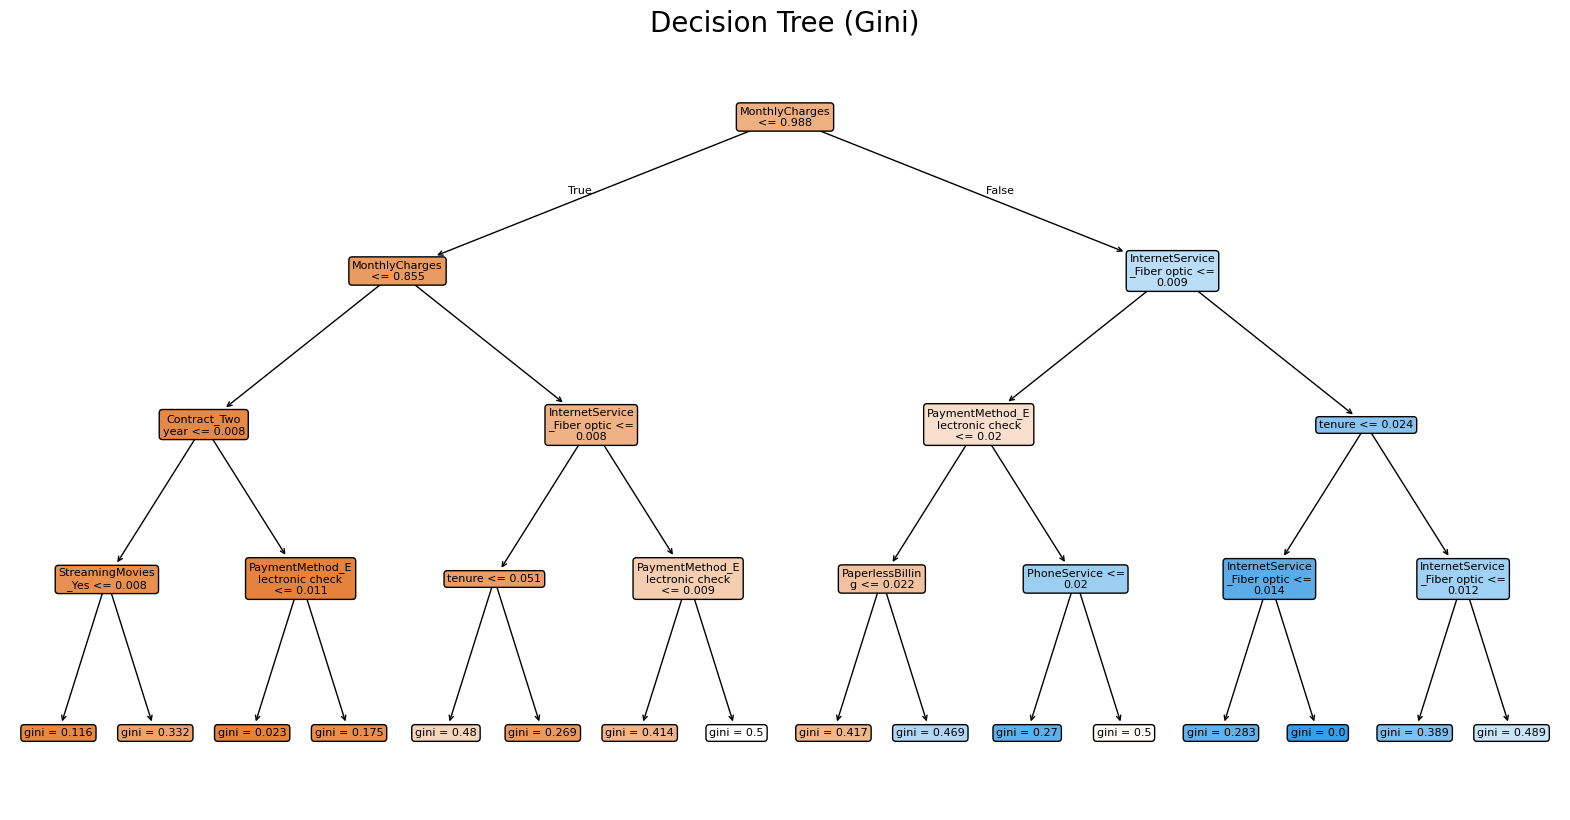

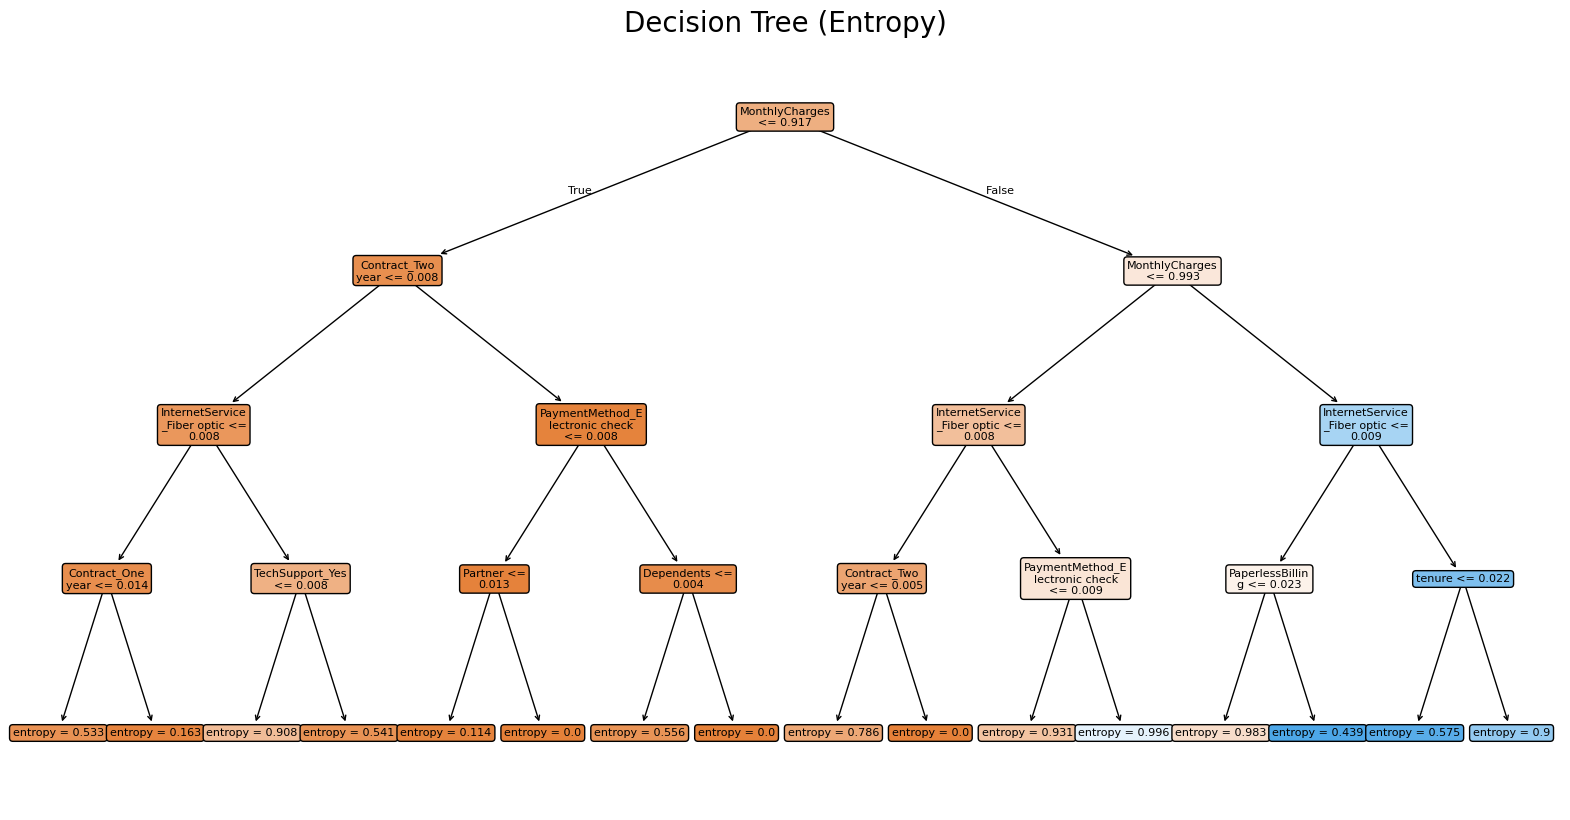

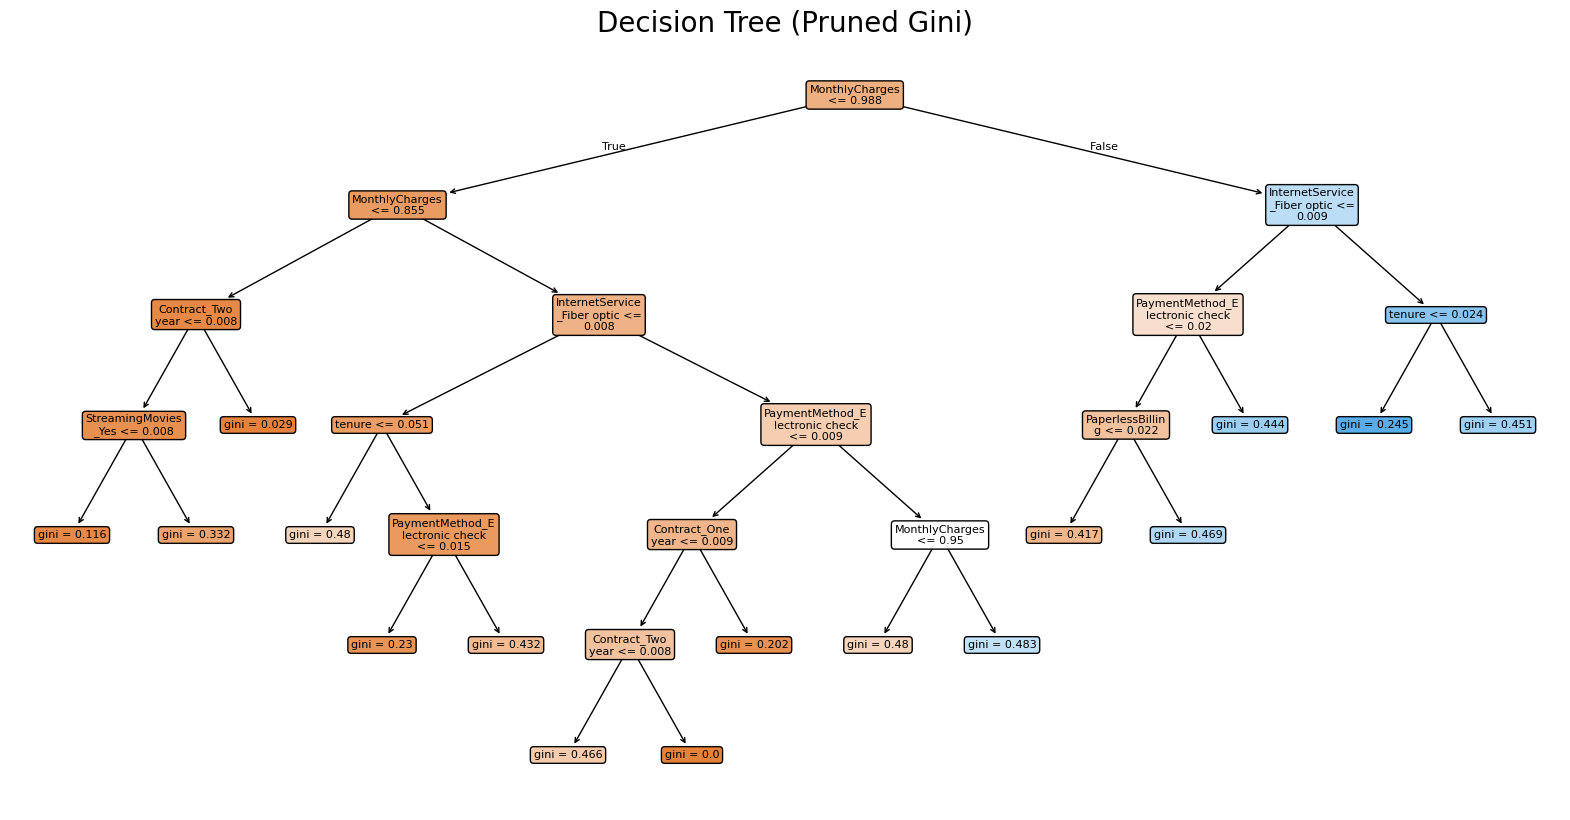

In [7]:
# Plot decision trees
plot_decision_tree(clf_gini, X.columns, ["No Churn", "Churn"], title="Decision Tree (Gini)")
plot_decision_tree(clf_entropy, X.columns, ["No Churn", "Churn"], title="Decision Tree (Entropy)")
plot_decision_tree(clf_pruned, X.columns, ["No Churn", "Churn"], title="Decision Tree (Pruned Gini)")

In [12]:
# Visualize KNN
_, _, X_train_knn, X_test_knn, y_train_knn, y_test_knn = splitdataset(data, norm_for_knn=True)
clf_knn = train_knn(X_train_knn, y_train, n_neighbors=5)

y_pred_knn = prediction(X_test_knn, clf_knn)
cal_accuracy(y_test, y_pred_knn, "\t\t   KNN Algorithm (k=5)")

Predicted values: [0 1 1 0 1 0 0 1 1 0]
[0 1 1 ... 1 0 0]

		   KNN Algorithm (k=5)

Confusion Matrix:
 [[1284  268]
 [ 233  328]]
Accuracy: 76.28963558920965
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      1552
           1       0.55      0.58      0.57       561

    accuracy                           0.76      2113
   macro avg       0.70      0.71      0.70      2113
weighted avg       0.77      0.76      0.77      2113



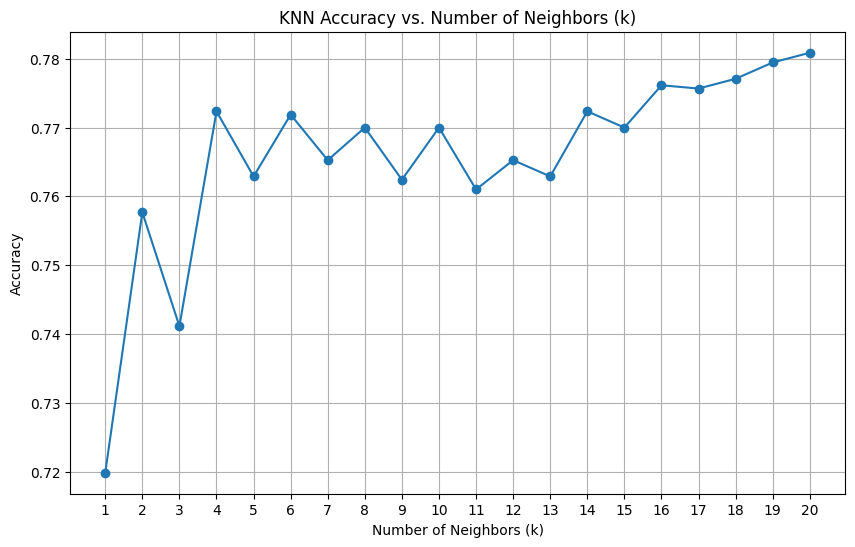

In [9]:
# Plot KNN accuracy vs. k
plot_knn_accuracy(X_train_knn, X_test_knn, y_train_knn, y_test_knn)